# Cramér's V

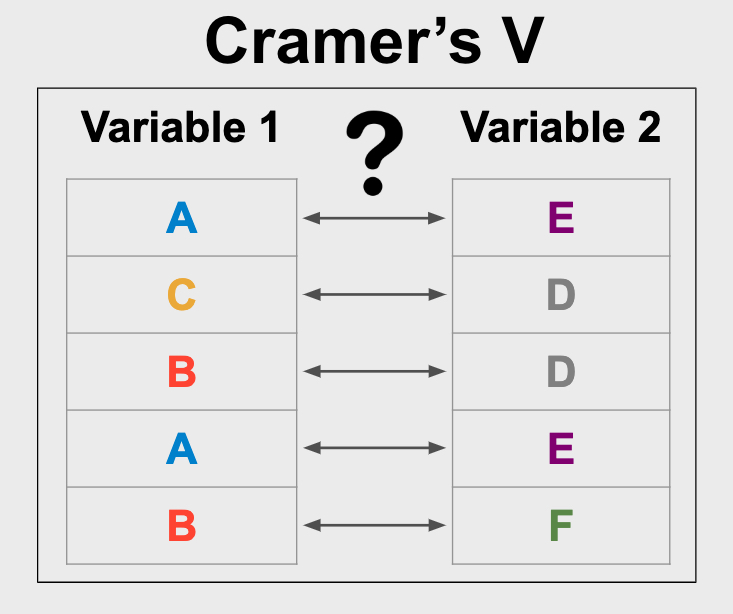

## Introduction

Cramér's V algorithm is often used when you have two categorical variables and you want to measure the strength of the association between them.

Cramér's V is the most popular of the chi-square-based measures of nominal association because it gives good norming from 0 to 1 regardless of table size, when row marginals equal column marginals in a two-way frequency table which is a table that displays the frequencies (or “counts”) for two categorical variables.

Cramér’s V is also known as Cramer’s Phi.

### Assumptions
- The two variables must be categorical.
- **Equal marginals**. Cramer's V require that the marginal distribution of the two variables be equal for the coefficient to reach 1.0.

### When to use the Cramer’s V?
- You want to know the **relationship** between two variables.
- Your variables of interest are **categorical**.
- You have **two or more unique values** per category.

Cramér's V rules has various interpretation, and one of them is from Cohen (1988). 

Cramér's V formula is as follow:

\begin{equation*}
V = \sqrt{\frac{\chi^2}{n\times df^*}}
\end{equation*}

Where $\chi^2$ is Chi-square,  $df^*$ the degrees of freedom, and $n$ the total sample size.

Cohen's interpretation depend on the degrees of freedom (df*); which is the minimum of rows or columns number minus one in a two-way frequency table.<br> <br>


<center>
$
df^* = \text{MIN}(r, c) - 1
$
</center>

> Where $r$ is the rows number , and $c$ the columns number.

Cramér’s V value ranges from 0 to 1, where 0 indicates no relationship and 1 indicates perfect association.

Cohen's interpretation is shown in the table below:

|df*|negligible|small|medium|large|
|-------|---|---|---|---|
|1|0 < .10|.10 < .30|.30 < .50|.50 or more|
|2|0 < .07|.07 < .21|.21 < .35|.35 or more|
|3|0 < .06|.06 < .17|.17 < .29|.29 or more|
|4|0 < .05|.05 < .15|.15 < .25|.25 or more|
|5|0 < .05|.05 < .13|.13 < .22|.22 or more|


## Example

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Cramer_V_Dataset.csv')
df.head()

,Marital_status,Gender
0,MARRIED,MALE
1,DIVORCED,FEMALE
2,MARRIED,FEMALE
3,SEPARATED,FEMALE
4,DIVORCED,MALE


In [3]:
df.dropna(inplace=True)
df.shape

(1941, 2)

In [16]:
pd.crosstab(df['Marital_status'], df['Gender'],  margins=True)

Gender,FEMALE,MALE,All
Marital_status,,,
DIVORCED,172,142,314
MARRIED,516,456,972
NEVER MARRIED,207,188,395
SEPARATED,50,29,79
WIDOWED,123,58,181
All,1068,873,1941


In [15]:
df_count = pd.crosstab(df['Marital_status'], df['Gender'])
df_count

Gender,FEMALE,MALE
Marital_status,,
DIVORCED,172,142
MARRIED,516,456
NEVER MARRIED,207,188
SEPARATED,50,29
WIDOWED,123,58


## Using Scipy

The formula for Cramér's V is:

\begin{equation*}
V = \sqrt{\frac{\chi^2}{n\times\left(\text{MIN}\left(r, c\right) - 1\right)}}
\end{equation*}

Where $\chi^2$ is Chi-square,  $r$ the rows number, $c$ the columns numbers, and $n$ the total sample size.

In [5]:
df_count.shape

(5, 2)

In [6]:
r = df_count.shape[0]
c = df_count.shape[1]
n = df_count.to_numpy().sum()

r, c, n

(5, 2, 1941)

In [7]:
df_Star = min(r, c) - 1
df_Star

1

In [17]:
from scipy.stats import chi2_contingency

chiVal, pVal, df, exp = chi2_contingency(df_count)
chiVal, pVal

(16.989749099448613, 0.0019418339492422961)

In [9]:
V = np.sqrt(chiVal / (n*df_Star))
V

0.09355795383688979

So, we have **df* = 1**, and **Cramér's V = 0.0936**.

Looking back at the previous table:

|df*|<mark>negligible</mark>|small|medium|large|
|-------|---|---|---|---|
|**1**|**0 < .10**|.10 < .30|.30 < .50|.50 or more|
|2|0 < .07|.07 < .21|.21 < .35|.35 or more|
|3|0 < .06|.06 < .17|.17 < .29|.29 or more|
|4|0 < .05|.05 < .15|.15 < .25|.25 or more|
|5|0 < .05|.05 < .13|.13 < .22|.22 or more|


So it means the association between the Gender variable and Marital_status variable is **negligible**.

**Note** that a p-value less than or equal to 0.05 means that our result is statistically significant and we can trust that the difference is not due to chance alone.

## Using Researchpy

The easiest way to get Cramér's V is to use the researchpy package:

In [10]:
import researchpy   # https://researchpy.readthedocs.io/
df = pd.read_csv('Cramer_V_Dataset.csv')
_, res = researchpy.crosstab(df['Gender'], df['Marital_status'], test='chi-square')
res

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,16.9897
1,p-value =,0.0019
2,Cramer's V =,0.0936


In [11]:
df_count

Gender,FEMALE,MALE
Marital_status,,
DIVORCED,172,142
MARRIED,516,456
NEVER MARRIED,207,188
SEPARATED,50,29
WIDOWED,123,58


> **Cramér's V is a symmetrical measure**. It does not matter which is the independent (column) variable.

From the result above **Cramér's V value is 0.0936**, next we need to get the degrees of freedom ( df* ):

In [12]:
df_Star = min(df_count.shape[0], df_count.shape[1]) - 1
df_Star

1

and we have the same result **df* = 1**, and **Cramér's V = 0.0936**.

### References
> Statistics by Peter, Nominal vs. Nominal, [Link](https://peterstatistics.com/CrashCourse/3-TwoVarUnpair/NomNom/NomNom-2c-Effect-Size.html). 

> Virginia Commonwealth University, Nominal Association: Phi and Cramer's V, [Link](https://www.people.vcu.edu/~pdattalo/702SuppRead/MeasAssoc/NominalAssoc.html).

> StatsTest, Cramer’s V, [Link](https://www.statstest.com/cramers-v-2/).